In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
import mapclassify
sns.set(style="white")

In [21]:
sys.path.append('..')

In [22]:
df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')
df_19 = pd.read_csv('../Data/processed/EXANBR19.csv')
df_20 = pd.read_csv('../Data/processed/EXANBR20.csv')

C:\Users\denis\AppData\Local\Temp\ipykernel_11488\3890119570.py:1: DtypeWarning: Columns (26,29,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')


In [23]:
a = df_18[df_18['COPAISINF'] != 1]

In [24]:
a['ID_PAIS']

0       1
1       1
3       1
4       1
5       1
       ..
9298    1
9305    1
9324    1
9325    1
9326    1
Name: ID_PAIS, Length: 425, dtype: int64

In [25]:
df_18.columns

Index(['Unnamed: 0', 'TP_NOT', 'ID_AGRAVO', 'CS_SUSPEIT', 'DT_NOTIFIC',
       'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA',
       ...
       'MUN_DES2', 'MUN_DES3', 'PA_DES1', 'PA_DES2', 'PA_DES3', 'DS_TRANS1',
       'DS_TRANS2', 'DS_TRANS3', 'SIN_YEAR', 'SIN_WEEK'],
      dtype='object', length=110)

In [26]:
mun_file = pd.read_csv('../Data/age_groups_municipalities.csv')
mun_file = mun_file[['Municipio','Total']]
mun_file['ID_MN_RESI'] = mun_file['Municipio'].astype(str).str[:6].astype(int)

In [27]:
df = pd.concat([df_18,df_19,df_20])

In [28]:
df = df[df['DT_SIN_PRI'] >= '2018-01-01']

In [29]:
df['CASE'] = 1

In [30]:
df_cases = df.groupby(['ID_MN_RESI'])['CASE'].sum()

In [31]:
df_cases = df_cases.reset_index()

In [32]:
df_cases = df_cases.merge(mun_file, how = 'left', on = 'ID_MN_RESI')

In [33]:
df_cases['CASES_100k'] = (df_cases['CASE']/df_cases['Total'])*(100000)

In [34]:
df_cases['LOG'] = np.log(df_cases['CASES_100k'])

In [35]:
map_br = geobr.read_municipality()

In [36]:
map_br['code_muni'] = map_br['code_muni'].astype(str).str[:6].astype(int)
map_br = map_br.merge(df_cases, how = 'left', left_on = 'code_muni', right_on = 'ID_MN_RESI')

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

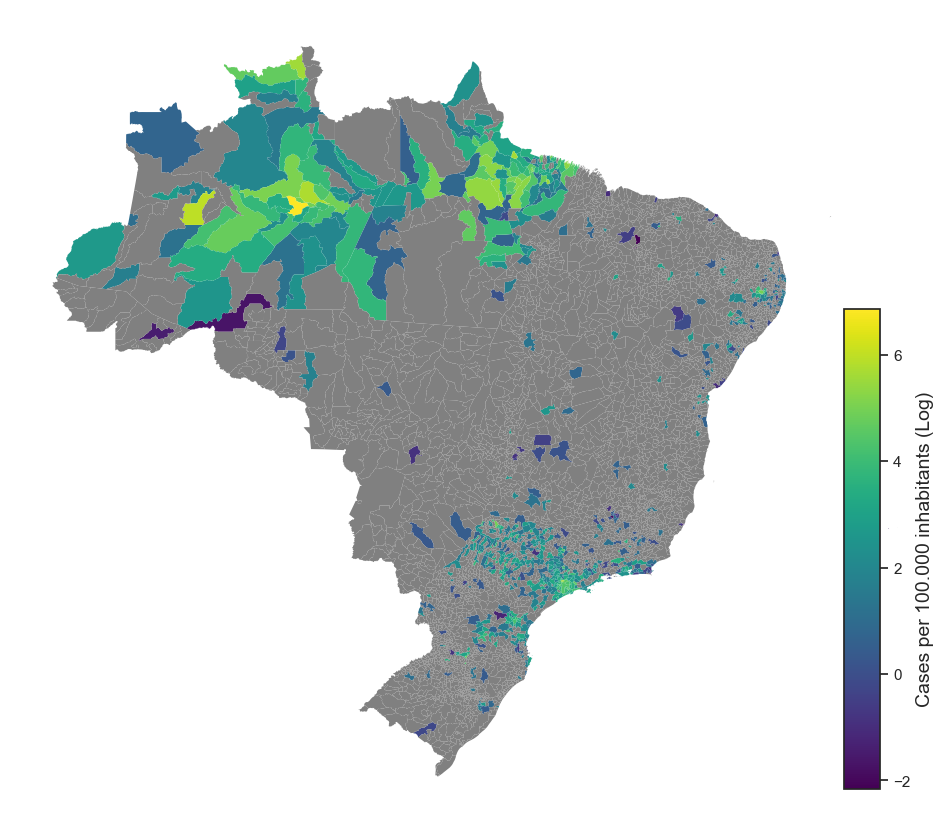

In [37]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='LOG', 
        missing_kwds=missing_kwds,
        linewidth=0.0,
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.82,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["LOG"].min(),  
            vmax=map_br["LOG"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

#axs.set_title(
 #   "Date of symptom onset of first case of Measles per municipality",
 #  fontdict={"fontsize": 15},
 #   )
cax.set_ylabel('Cases per 100.000 inhabitants (Log)', rotation=90, fontsize = 14)

axs.axis("off") 
plt.savefig('../Figs/cases_100k_map.pdf',bbox_inches='tight')

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

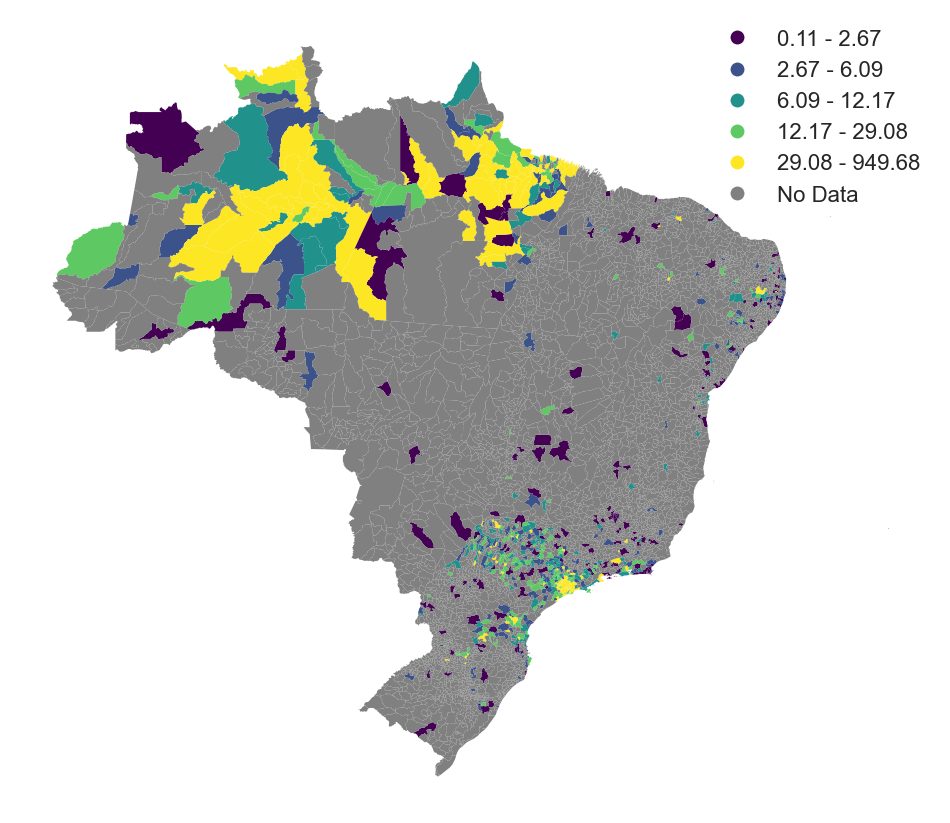

In [38]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='CASES_100k', 
        missing_kwds=missing_kwds,
        linewidth=0.0,
        cmap = 'viridis',
        scheme = 'quantiles',
        legend = True,
        legend_kwds={'fontsize':16,'frameon':False}
    )


axs.axis("off") 
plt.savefig('../Figs/cases_100k_map_chr.pdf',bbox_inches='tight')